## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Loading the Excel file
excel_data = pd.ExcelFile('Data Analyst Intern Assignment - Excel.xlsx')

# Parsing each sheet into DataFrames
User_Details = excel_data.parse('UserDetails.csv')
Cooking_Details = excel_data.parse('CookingSessions.csv')
Order_Details = excel_data.parse('OrderDetails.csv')

## Inspecting the structure of each dataset

In [5]:
User_Details.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


In [6]:
Cooking_Details.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7


In [7]:
Order_Details.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


In [8]:
User_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            10 non-null     object        
 1   User Name          10 non-null     object        
 2   Age                10 non-null     int64         
 3   Location           10 non-null     object        
 4   Registration Date  10 non-null     datetime64[ns]
 5   Phone              10 non-null     object        
 6   Email              10 non-null     object        
 7   Favorite Meal      10 non-null     object        
 8   Total Orders       10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 852.0+ bytes


In [9]:
Cooking_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Session ID       16 non-null     object        
 1   User ID          16 non-null     object        
 2   Dish Name        16 non-null     object        
 3   Meal Type        16 non-null     object        
 4   Session Start    16 non-null     datetime64[ns]
 5   Session End      16 non-null     datetime64[ns]
 6   Duration (mins)  16 non-null     int64         
 7   Session Rating   16 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 1.1+ KB


In [10]:
Order_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      16 non-null     int64         
 1   User ID       16 non-null     object        
 2   Order Date    16 non-null     datetime64[ns]
 3   Meal Type     16 non-null     object        
 4   Dish Name     16 non-null     object        
 5   Order Status  16 non-null     object        
 6   Amount (USD)  16 non-null     float64       
 7   Time of Day   16 non-null     object        
 8   Rating        14 non-null     float64       
 9   Session ID    16 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 1.4+ KB


In [11]:
User_Details.fillna({'Age': User_Details['Age'].mean()}, inplace=True)

## Merge User_Details with Cooking_Details


In [13]:
user_cooking_data = pd.merge(User_Details,Cooking_Details,on="User ID",how="inner")

# Merging the result with Order_Details

final_data = pd.merge(user_cooking_data,Order_Details,on=["User ID", "Session ID"],suffixes=("_cooking", "_order"))

In [14]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            16 non-null     object        
 1   User Name          16 non-null     object        
 2   Age                16 non-null     int64         
 3   Location           16 non-null     object        
 4   Registration Date  16 non-null     datetime64[ns]
 5   Phone              16 non-null     object        
 6   Email              16 non-null     object        
 7   Favorite Meal      16 non-null     object        
 8   Total Orders       16 non-null     int64         
 9   Session ID         16 non-null     object        
 10  Dish Name_cooking  16 non-null     object        
 11  Meal Type_cooking  16 non-null     object        
 12  Session Start      16 non-null     datetime64[ns]
 13  Session End        16 non-null     datetime64[ns]
 14  Duration (mi

In [17]:
final_data.isnull().sum()

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
Session ID           0
Dish Name_cooking    0
Meal Type_cooking    0
Session Start        0
Session End          0
Duration (mins)      0
Session Rating       0
Order ID             0
Order Date           0
Meal Type_order      0
Dish Name_order      0
Order Status         0
Amount (USD)         0
Time of Day          0
Rating               2
dtype: int64

## Analyzing the Data

In [20]:
cooking_order_analysis = final_data.groupby("Session ID")["Order ID"].count()

In [21]:
cooking_order_analysis

Session ID
S001    1
S002    1
S003    1
S004    1
S005    1
S006    1
S007    1
S008    1
S009    1
S010    1
S011    1
S012    1
S013    1
S014    1
S015    1
S016    1
Name: Order ID, dtype: int64

#### Popular Dishes

In [26]:
popular_dishes = final_data["Dish Name_cooking"].value_counts()

In [27]:
popular_dishes

Dish Name_cooking
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64

#### Demographic Analysis

In [28]:
demographic_analysis = final_data.groupby(["Age"])["Order ID"].count()
demographic_analysis

Age
25    1
27    2
28    3
30    2
31    1
35    3
38    1
42    3
Name: Order ID, dtype: int64

### Visualizations

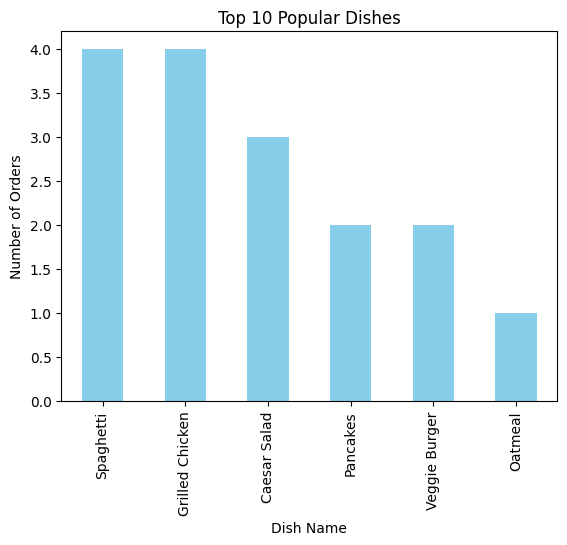

In [29]:
# Top 10 Popular Dishes
popular_dishes.head(10).plot(kind='bar', title='Top 10 Popular Dishes', color='skyblue')
plt.xlabel("Dish Name")
plt.ylabel("Number of Orders")
plt.show()


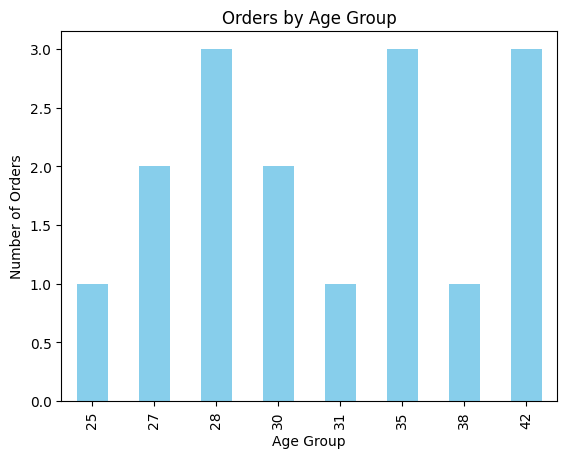

In [32]:
# Group by 'age_group' only
demographic_data = final_data.groupby("Age")["Order ID"].count()

# Plotting the data as a bar chart (heatmap doesn't apply here)
demographic_data.plot(kind="bar", title="Orders by Age Group", color="skyblue")
plt.xlabel("Age Group")
plt.ylabel("Number of Orders")
plt.show()
